In [23]:
!pip install kagglehub[pandas-datasets]
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from kagglehub import KaggleDatasetAdapter

from sklearn.metrics import mean_squared_error

In [24]:
# Download latest version
path = kagglehub.dataset_download("orvile/airline-market-fare-prediction-data")

# Set the path to the file you'd like to load
file_path = "Airline_Market_Fare_Prediction_Data/MarketFarePredictionData.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "orvile/airline-market-fare-prediction-data",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

/tmp/ipython-input-24-1758971769.py:8: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [25]:
print("First 5 records:")
df.head()

First 5 records:


,MktCoupons,OriginCityMarketID,DestCityMarketID,OriginAirportID,DestAirportID,Carrier,NonStopMiles,RoundTrip,ODPairID,Pax,...,Circuity,Slot,Non_Stop,MktMilesFlown,OriginCityMarketID_freq,DestCityMarketID_freq,OriginAirportID_freq,DestAirportID_freq,Carrier_freq,ODPairID_freq
0,2,178,152,170,255,6,1807.0,1.0,4035,136.0,...,1.367460,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.022049,0.116826,0.000132
1,2,178,152,170,194,20,1798.0,1.0,4035,136.0,...,1.051724,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.008368,0.307651,0.000132
2,2,178,152,170,260,6,1784.0,0.0,4035,136.0,...,1.034753,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.009366,0.116826,0.000132
3,2,178,152,170,255,6,1807.0,1.0,4035,136.0,...,1.029884,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.022049,0.116826,0.000132
4,2,178,152,170,194,20,1798.0,1.0,4035,136.0,...,1.062291,0,0.0,1992.449761,0.004138,0.039783,0.004138,0.008368,0.307651,0.000132


In [26]:
# Get dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581278 entries, 0 to 1581277
Data columns (total 26 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   MktCoupons               1581278 non-null  int64  
 1   OriginCityMarketID       1581278 non-null  int64  
 2   DestCityMarketID         1581278 non-null  int64  
 3   OriginAirportID          1581278 non-null  int64  
 4   DestAirportID            1581278 non-null  int64  
 5   Carrier                  1581278 non-null  int64  
 6   NonStopMiles             1581278 non-null  float64
 7   RoundTrip                1581278 non-null  float64
 8   ODPairID                 1581278 non-null  int64  
 9   Pax                      1581278 non-null  float64
 10  CarrierPax               1581278 non-null  float64
 11  Average_Fare             1581278 non-null  float64
 12  Market_share             1581278 non-null  float64
 13  Market_HHI               1581278 non-null 

In [27]:
# Generate summary statistics
df.describe()

,MktCoupons,OriginCityMarketID,DestCityMarketID,OriginAirportID,DestAirportID,Carrier,NonStopMiles,RoundTrip,ODPairID,Pax,...,Circuity,Slot,Non_Stop,MktMilesFlown,OriginCityMarketID_freq,DestCityMarketID_freq,OriginAirportID_freq,DestAirportID_freq,Carrier_freq,ODPairID_freq
count,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,...,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06,1.581278e+06
mean,1.179463e+00,1.081836e+02,1.088161e+02,1.483760e+02,1.492537e+02,1.277755e+01,1.183158e+03,8.052215e-01,2.488494e+03,1.773202e+05,...,1.026428e+00,1.213386e-01,8.220598e-01,1.213717e+03,2.654614e-02,2.652975e-02,1.657893e-02,1.658640e-02,1.527605e-01,7.775990e-04
std,3.876878e-01,6.779829e+01,6.824662e+01,7.974261e+01,8.006476e+01,7.785476e+00,7.136535e+02,3.960302e-01,1.401771e+03,2.380289e+05,...,1.091917e-01,3.265204e-01,3.824626e-01,7.268271e+02,1.934480e-02,1.924849e-02,1.008668e-02,1.007899e-02,1.119035e-01,9.117999e-04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+02,0.000000e+00,0.000000e+00,1.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,1.020000e+02,4.426799e-06,2.529599e-06,4.426799e-06,2.529599e-06,3.958823e-04,6.323999e-07
25%,1.000000e+00,4.800000e+01,4.800000e+01,7.300000e+01,7.400000e+01,4.000000e+00,6.430000e+02,1.000000e+00,1.349000e+03,3.182400e+04,...,1.000000e+00,0.000000e+00,1.000000e+00,6.580258e+02,1.037452e-02,1.050922e-02,8.544355e-03,8.631626e-03,5.086329e-02,2.093244e-04
50%,1.000000e+00,1.070000e+02,1.080000e+02,1.500000e+02,1.510000e+02,1.500000e+01,1.011000e+03,1.000000e+00,2.598000e+03,8.654300e+04,...,1.000000e+00,0.000000e+00,1.000000e+00,1.040641e+03,2.645202e-02,2.620602e-02,1.636777e-02,1.672128e-02,1.168264e-01,4.648139e-04
75%,1.000000e+00,1.580000e+02,1.590000e+02,2.130000e+02,2.140000e+02,2.000000e+01,1.590000e+03,1.000000e+00,3.493000e+03,2.318210e+05,...,1.000000e+00,0.000000e+00,1.000000e+00,1.639106e+03,3.978681e-02,3.978301e-02,2.324512e-02,2.335263e-02,3.076512e-01,1.035239e-03
max,3.000000e+00,2.660000e+02,2.670000e+02,2.900000e+02,2.910000e+02,2.400000e+01,5.095000e+03,1.000000e+00,5.354000e+03,1.495396e+06,...,2.985825e+00,1.000000e+00,1.000000e+00,5.096521e+03,6.692372e-02,6.629195e-02,3.630165e-02,3.597090e-02,3.076512e-01,5.302673e-03


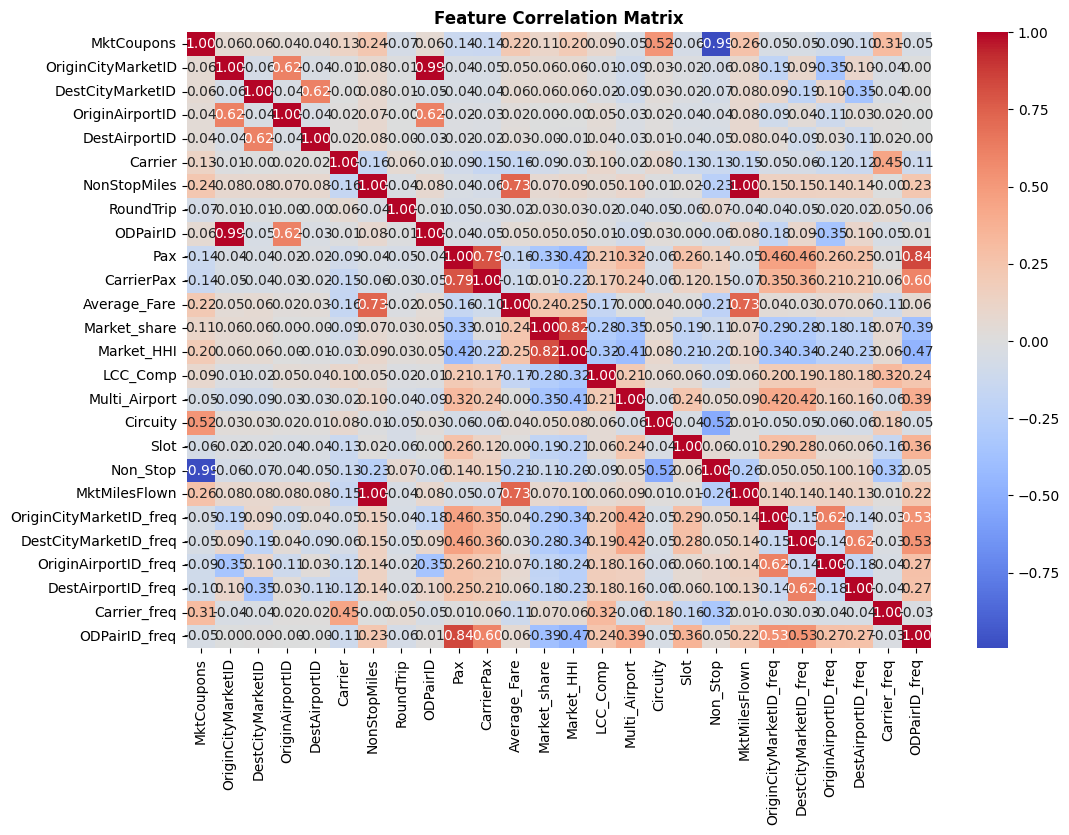

In [28]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix", fontweight='bold')
plt.show()

In [29]:
# Create a copy of the dataset
flights_processed = df.copy()

# Handle missing values if any
flights_processed.dropna(inplace=True)

# Split features and target variable
X = flights_processed.drop("Average_Fare", axis=1)
y = flights_processed["Average_Fare"]

# Feature scaling. The resulting features will have a mean 0 and a variance 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for better handling
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

The mean fare price is  214.4830666334446
The standard deviation of the fare price is  73.37320109376054


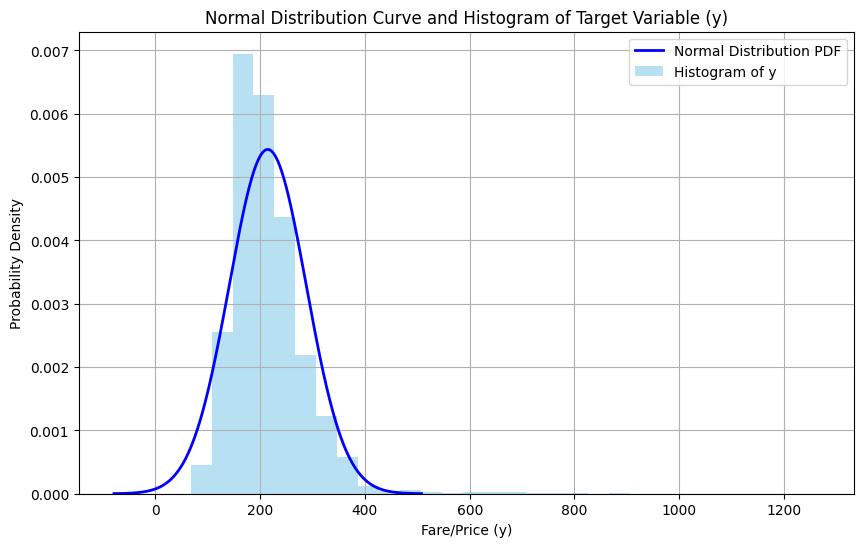

In [30]:
# Data properties
data = np.array(y)
mean_value = np.mean(data)
print("The mean fare price is ", mean_value)
print("The standard deviation of the fare price is ", np.std(data))

from scipy.stats import norm
data = np.array(y)
mean_value = np.mean(data)
std_dev = np.std(data)

x = np.linspace(mean_value - 4*std_dev, mean_value + 4*std_dev, 500)
pdf = norm.pdf(x, loc=mean_value, scale=std_dev)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf, color='blue', linewidth=2, label='Normal Distribution PDF')
plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', label='Histogram of y')
plt.title('Normal Distribution Curve and Histogram of Target Variable (y)')
plt.xlabel('Fare/Price (y)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

# First split: 80% temp (train+val), 20% test
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# Second split: from the 80% temp, split 75% train, 25% val → 60/20/20 overall
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Print shapes to verify
print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (948766, 25)
Validation set size: (316256, 25)
Testing set size: (316256, 25)


In [33]:
def calculate_weights(x, query_point, tau):
    x = np.asarray(x)
    query_point = np.asarray(query_point)
    distances = np.sum((x - query_point) ** 2, axis=1)
    weights = np.exp(-distances / (2 * tau ** 2))
    return weights  # Just return the weight vector


def locally_weighted_regression(x, y, query_point, tau):
    x = np.asarray(x)
    y = np.asarray(y)
    query_point = np.asarray(query_point)

    # Add bias term
    x_b = np.c_[np.ones(len(x)), x]
    query_point_b = np.insert(query_point, 0, 1)

    # Compute weight vector (not matrix)
    weights = calculate_weights(x, query_point, tau)

    # Weighted linear regression using vector weights
    # Efficient computation: W is applied to each row via broadcasting
    XTW = x_b.T * weights  # (features x samples)
    xTWx = XTW @ x_b        # (features x features)
    xTWy = XTW @ y          # (features,)

    try:
        beta = np.linalg.solve(xTWx, xTWy)
    except np.linalg.LinAlgError:
        beta = np.linalg.pinv(xTWx) @ xTWy

    return query_point_b @ beta


def predict_lwlr(x_train, y_train, x_test, tau):
    y_pred = np.zeros(len(x_test))

    for i in range(len(x_test)):
        if isinstance(x_test, pd.DataFrame):
            x_i = x_test.iloc[i].values  # convert row to NumPy array
        else:
            x_i = x_test[i]
        y_pred[i] = locally_weighted_regression(x_train, y_train, x_i, tau)

    return y_pred

tau = 0.1, MSE = 0.0000
tau = 0.5, MSE = 1.1115
tau = 1.0, MSE = 115.4404
tau = 5.0, MSE = 1401.1440


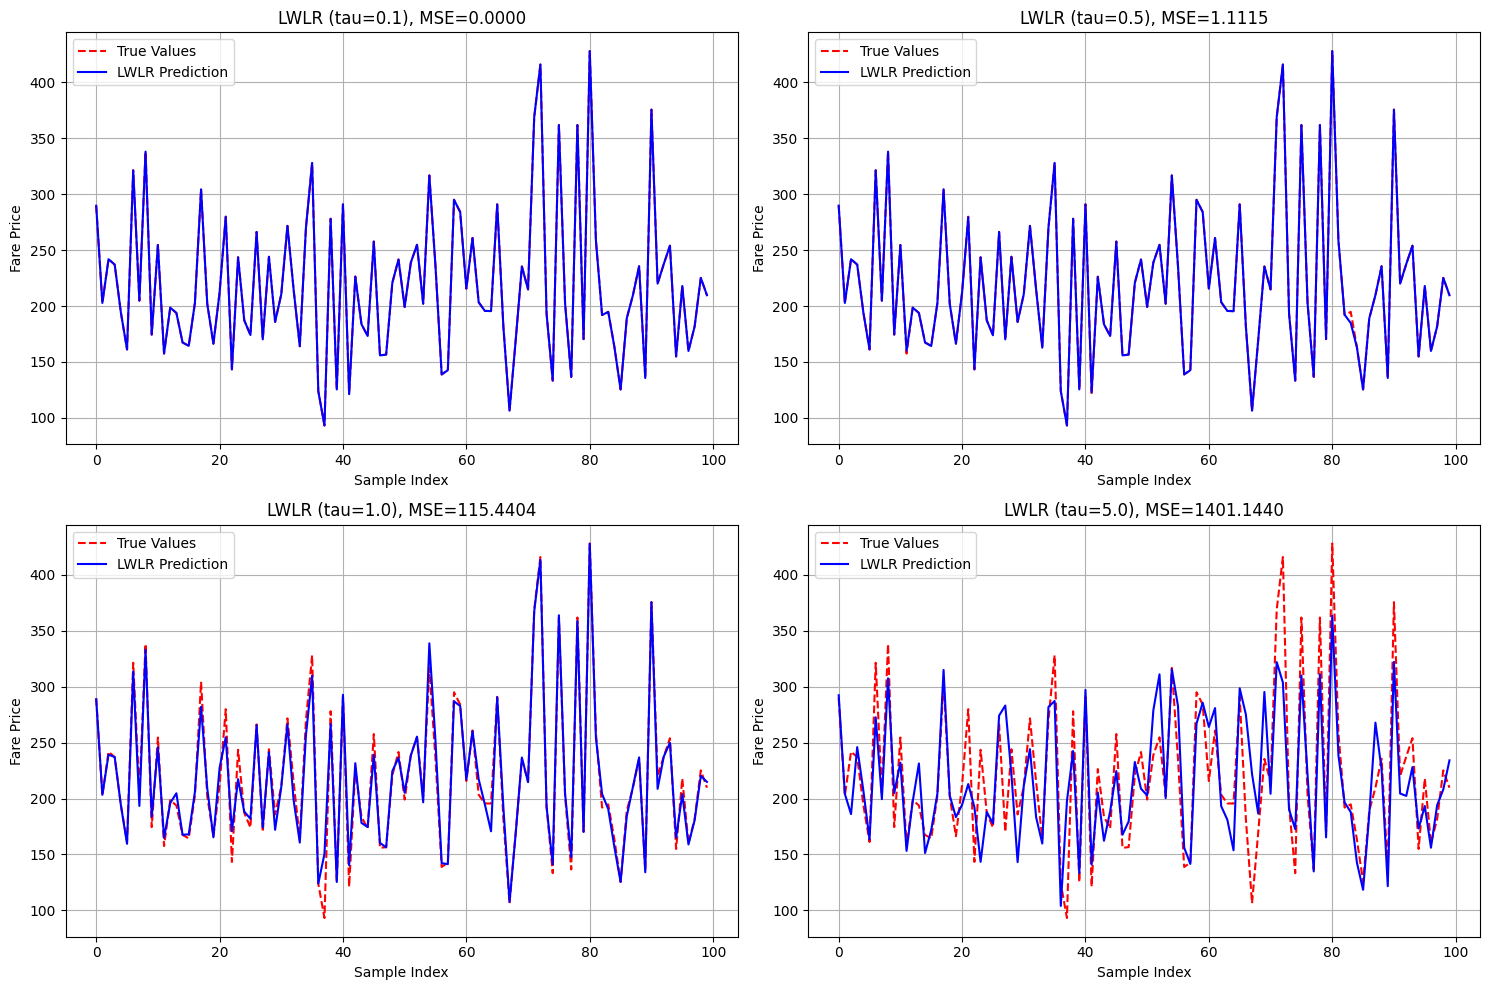

In [35]:
# tau values to test
tau_values = [0.1, 0.5, 1.0, 5.0]

# Subsample validation set to reduce memory/computation
sample_idx = np.linspace(0, len(X_val) - 1, 100, dtype=int)
X_val_sample = X_val.iloc[sample_idx]
y_val_sample = y_val.iloc[sample_idx]

plt.figure(figsize=(15, 10))

for i, tau in enumerate(tau_values):
    # Predict using training data on validation sample
    y_pred_lwlr = predict_lwlr(X_train, y_train, X_val_sample, tau)

    # Calculate MSE on validation sample
    mse_lwlr = mean_squared_error(y_val_sample, y_pred_lwlr)
    print(f"tau = {tau}, MSE = {mse_lwlr:.4f}")

    # Plot predictions vs true values
    plt.subplot(2, 2, i + 1)
    plt.plot(range(len(y_val_sample)), y_val_sample.values, 'r--', label='True Values')
    plt.plot(range(len(y_pred_lwlr)), y_pred_lwlr, 'b-', label='LWLR Prediction')
    plt.title(f'LWLR (tau={tau}), MSE={mse_lwlr:.4f}')
    plt.xlabel('Sample Index')
    plt.ylabel('Fare Price')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


Evaluating different tau values on validation set...
tau = 0.1000, RMSE = 0.0000
tau = 0.1274, RMSE = 0.0007
tau = 0.1624, RMSE = 0.0068
tau = 0.2069, RMSE = 0.0285
tau = 0.2637, RMSE = 0.0043
tau = 0.3360, RMSE = 0.0201
tau = 0.4281, RMSE = 0.3516
tau = 0.5456, RMSE = 1.3173
tau = 0.6952, RMSE = 3.0752
tau = 0.8859, RMSE = 7.9247
tau = 1.1288, RMSE = 13.7396
tau = 1.4384, RMSE = 21.0302
tau = 1.8330, RMSE = 27.7780
tau = 2.3357, RMSE = 32.0716
tau = 2.9764, RMSE = 34.6080
tau = 3.7927, RMSE = 36.2033
tau = 4.8329, RMSE = 37.3044
tau = 6.1585, RMSE = 38.0963
tau = 7.8476, RMSE = 38.6536
tau = 10.0000, RMSE = 39.0306


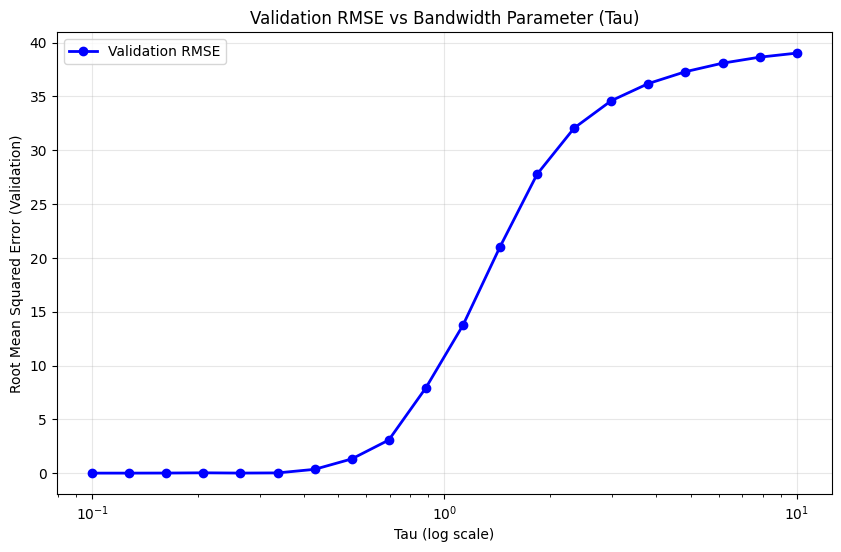


Optimal tau value (from validation set): 0.1000 with RMSE: 0.0000


TypeError: got an unexpected keyword argument 'squared'

In [90]:

from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Try a wider range of tau values (log scale)
tau_range = np.logspace(-1, 1, 20)  # 0.1 to 10
rmse_values = []

# Use a small validation sample to reduce memory cost
sample_idx = np.linspace(0, len(X_val) - 1, 100, dtype=int)
X_val_sample = X_val.iloc[sample_idx]
y_val_sample = y_val.iloc[sample_idx]

print("Evaluating different tau values on validation set...")
for tau in tau_range:
    y_pred = predict_lwlr(X_train, y_train, X_val_sample, tau)
    mse = mean_squared_error(y_val_sample, y_pred)
    rmse = np.sqrt(mse)
    rmse_values.append(rmse)
    print(f"tau = {tau:.4f}, RMSE = {rmse:.4f}")

# Plot RMSE vs Tau
plt.figure(figsize=(10, 6))
plt.semilogx(tau_range, rmse_values, 'o-', linewidth=2, color='blue', label='Validation RMSE')
plt.xlabel('Tau (log scale)')
plt.ylabel('Root Mean Squared Error (Validation)')
plt.title('Validation RMSE vs Bandwidth Parameter (Tau)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Find optimal tau
optimal_tau_idx = np.argmin(rmse_values)
optimal_tau = tau_range[optimal_tau_idx]
print(f"\nOptimal tau value (from validation set): {optimal_tau:.4f} with RMSE: {rmse_values[optimal_tau_idx]:.4f}")

# Subsample test set
sample_idx = np.linspace(0, len(X_test) - 1, 100, dtype=int)
X_test_sample = X_test.iloc[sample_idx]
y_test_sample = y_test.iloc[sample_idx]

y_pred_optimal = predict_lwlr(X_train, y_train, X_test_sample, optimal_tau)

test_rmse = mean_squared_error(y_test_sample, y_pred_optimal, squared=False)
print(f"\nFinal Test RMSE with optimal tau = {optimal_tau:.4f}: {test_rmse:.4f}")

# Plot prediction vs true values
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test_sample)), y_test_sample.values, 'r--', label='True Values')
plt.plot(range(len(y_pred_optimal)), y_pred_optimal, 'b-', label=f'Prediction (tau={optimal_tau:.4f})')
plt.title(f'LWLR Final Test Prediction (tau = {optimal_tau:.4f})')
plt.xlabel('Sample Index')
plt.ylabel('Fare Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [87]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Subsample a small number of test points (e.g., 500)
sample_size = 2500
np.random.seed(42)
sample_indices = np.random.choice(len(X_test), size=sample_size, replace=False)

X_test_sample = X_test.iloc[sample_indices]
y_test_sample = y_test.iloc[sample_indices]


# 2. Run LWLR only on the sampled test points
y_log_pred = predict_lwlr(X_train, y_train, X_test_sample, 1)

# 3. Inverse transform to original scale
# y_pred = np.exp(y_log_pred)
# y_true = np.exp(y_test_sample)
y_pred = y_log_pred
y_true = y_test_sample

print("y_true range:", y_true.min(), "to", y_true.max())
print("y_pred range:", y_pred.min(), "to", y_pred.max())


y_true range: 73.24 to 880.99
y_pred range: 82.14332803394399 to 880.8557986100817


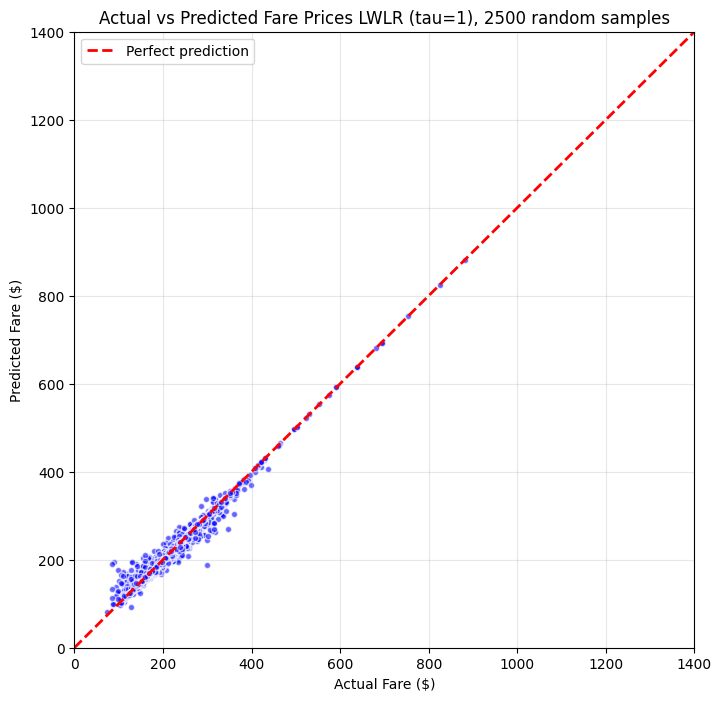

In [88]:
# 4. Plot actual vs predicted fares
plt.figure(figsize=(8, 8))
plt.scatter(y_true, y_pred, s=20, alpha=0.6, c='b', edgecolor='white')
plt.plot([0, 1400], [0, 1400], 'r--', linewidth=2, label='Perfect prediction')
plt.xlabel('Actual Fare ($)')
plt.ylabel('Predicted Fare ($)')
plt.title(f'Actual vs Predicted Fare Prices LWLR (tau=1), 2500 random samples')
plt.grid(True, alpha=0.3)
plt.xlim(0, 1400)
plt.ylim(0, 1400)
plt.legend()
plt.show()

In [ ]:
# Plot actual vs predicted fares
plt.figure(figsize=(8, 8))
plt.scatter(y_true, y_pred, alpha=0.6, edgecolor='none')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', linewidth=2)  # y=x reference line
plt.xlabel('Actual Fare Price')
plt.ylabel('Predicted Fare Price')
plt.title(f'Actual vs Predicted Fare Prices (tau={optimal_tau:.4f})')
plt.grid(True, alpha=0.3)
plt.show()

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Fixed tau value
tau_fixed = 1.0

# Performance-safe limits
max_points = 800000  # cap max training size for speed
step_size = 50_000
train_sizes = np.arange(step_size, max_points + 1, step_size)

# Sample 100 validation points
sample_idx = np.linspace(0, len(X_val) - 1, 100, dtype=int)
X_val_sample = X_val.iloc[sample_idx]
y_val_sample = y_val.iloc[sample_idx]

# Subsample 200 points from training set to compute train RMSE
def sample_training_subset(X, y, size=200):
    idx = np.random.choice(len(X), size=min(size, len(X)), replace=False)
    return X.iloc[idx], y.iloc[idx]

train_rmse = []
val_rmse = []

print(f"\nEvaluating learning curve for tau = {tau_fixed}...\n")

for n_train in train_sizes:
    X_subset = X_train.iloc[:n_train]
    y_subset = y_train.iloc[:n_train]

    # Subsample from training set for train RMSE
    X_sample, y_sample = sample_training_subset(X_subset, y_subset)
    y_train_pred = predict_lwlr(X_subset, y_subset, X_sample, tau_fixed)
    train_mse = mean_squared_error(y_sample, y_train_pred)
    train_rmse.append(np.sqrt(train_mse))

    # Validation RMSE (already small set)
    y_val_pred = predict_lwlr(X_subset, y_subset, X_val_sample, tau_fixed)
    val_mse = mean_squared_error(y_val_sample, y_val_pred)
    val_rmse.append(np.sqrt(val_mse))

    print(f"Processed {n_train} samples: Train RMSE = {train_rmse[-1]:.4f}, Val RMSE = {val_rmse[-1]:.4f}")





Evaluating learning curve for tau = 1.0...

Processed 50000 samples: Train RMSE = 11.4936, Val RMSE = 14.2108
Processed 100000 samples: Train RMSE = 10.9530, Val RMSE = 12.7842
Processed 150000 samples: Train RMSE = 9.1645, Val RMSE = 12.4467
Processed 200000 samples: Train RMSE = 9.0321, Val RMSE = 11.6760
Processed 250000 samples: Train RMSE = 7.7199, Val RMSE = 10.7034
Processed 300000 samples: Train RMSE = 10.8853, Val RMSE = 10.8566
Processed 350000 samples: Train RMSE = 7.9814, Val RMSE = 10.5141
Processed 400000 samples: Train RMSE = 10.5352, Val RMSE = 10.7366
Processed 450000 samples: Train RMSE = 11.6689, Val RMSE = 10.6913
Processed 500000 samples: Train RMSE = 12.1799, Val RMSE = 10.6432
Processed 550000 samples: Train RMSE = 11.2297, Val RMSE = 10.6394
Processed 600000 samples: Train RMSE = 13.5411, Val RMSE = 10.6561
Processed 650000 samples: Train RMSE = 12.3615, Val RMSE = 10.6257
Processed 700000 samples: Train RMSE = 8.3698, Val RMSE = 10.6341
Processed 750000 sample

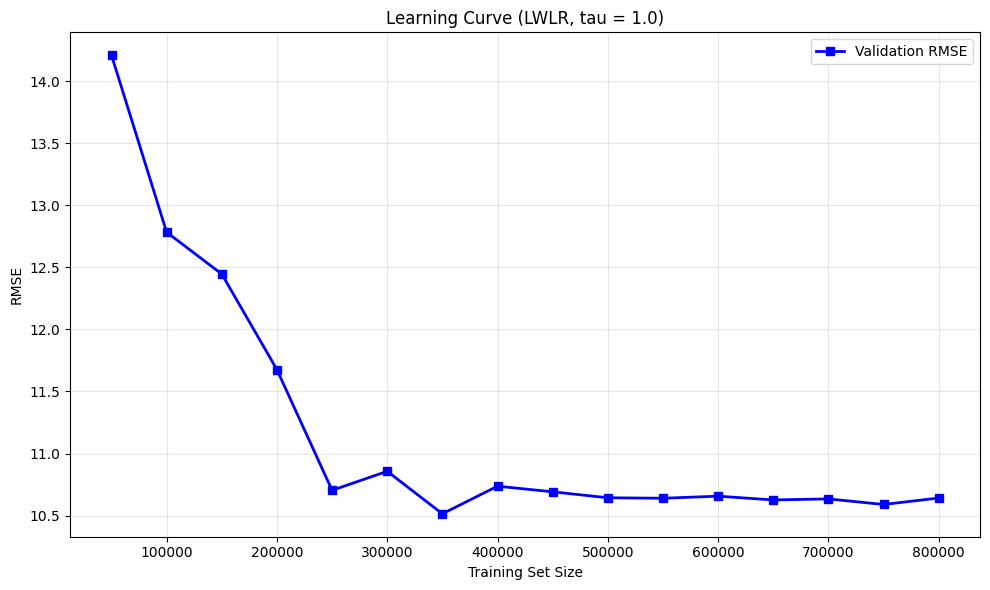

In [104]:
# Plot learning curve
plt.figure(figsize=(10, 6))

# Plot validation RMSE
plt.plot(train_sizes, val_rmse, 's-', color='blue', label='Validation RMSE', linewidth=2)

# Labels and title
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.title(f'Learning Curve (LWLR, tau = {tau_fixed})')

# Legend with both curves
plt.legend()

# Grid for readability
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
